# Brain Age Prediction Lasso

In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regressor

In [2]:

from sklearn.neighbors import KNeighborsRegressor
from base_regressor import BaseRegressor
from Plotter import Plotter

from skopt.space import Real, Categorical, Integer

class KNNRegressor(BaseRegressor):
   def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="KNN"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
         
        self.model_ml= KNeighborsRegressor
        if params is None:
            self.params = {
                'n_neighbors': 5,  # Número de vecinos
                'weights': 'uniform',  # Pesos uniformes para todos los vecinos
                'p': 1
            }
        if params_space is None:
            self.params_space = {
                'n_neighbors': Integer(1, 50),        
                'weights': Categorical(['uniform', 'distance']),
                'p': Integer(1, 2)
            }



c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model = KNNRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'teal'
nameset = 'KNN'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()



In [4]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# DATA

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle

file_path_CN = f'{path}Brain_Age/Data/CN_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)


df_CN_filtrado = df_CN[(df_CN['Age'] >=20) & (df_CN['Age'] <= 90)].reset_index(drop=True)


X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

#Scaler segun algoritmo
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)

X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)

# Hyperparameter Tuning

In [ ]:
#'neg_mean_absolute_error'
#'neg_mean_squared_error'
#'neg_root_mean_squared_error'
#'explained_variance'
#'r2'

opt_model, best_params = model.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='neg_mean_absolute_error')


In [7]:
with open(f'results_model/opt_model.pickle', 'rb') as file:
    opt_model= pickle.load(file)

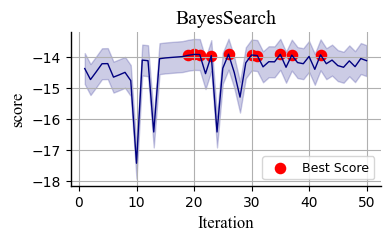

Top 1: Iteration 26, Score -13.90410818035348
Top 2: Iteration 35, Score -13.908885494987468
Top 3: Iteration 20, Score -13.910936457998265
Top 4: Iteration 21, Score -13.916087499987208
Top 5: Iteration 42, Score -13.924144493572948
Top 6: Iteration 30, Score -13.929482323232325
Top 7: Iteration 37, Score -13.933722354338391
Top 8: Iteration 19, Score -13.938165416349179
Top 9: Iteration 31, Score -13.947347017681945
Top 10: Iteration 23, Score -13.94962229328157


In [8]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.5)

In [9]:
best_params_ = model.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'n_neighbors': 14, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 12, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 14, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 12, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 16, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 15, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 17, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 13, 'p': 1, 'weights': 'distance'}]

In [10]:
best_params=opt_model.best_params_

# Training

In [ ]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params,
        scaler=Scaler_reg_train
    )

In [14]:
results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test]


In [15]:
with open('results_model/results_training.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [16]:
with open('results_model/results_training.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test, results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train, df_CN_avg_test = loaded_results

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     622.9
Date:                Thu, 06 Mar 2025   Prob (F-statistic):          5.86e-113
Time:                        00:26:05   Log-Likelihood:                -4851.7
No. Observations:                1323   AIC:                             9707.
Df Residuals:                    1321   BIC:                             9718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3843      0.658     52.262      0.0

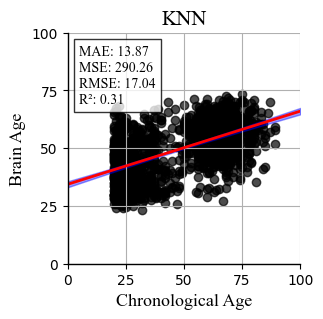

Error medio absoluto: 13.872166882626068
Error cuadrático medio: 290.25550002929805
Raíz del error cuadrático medio: 17.036886453495487
Coeficiente de determinación (R²): 0.3124864209889787


In [17]:
Plotters.plot_regresion(y=df_CN_avg_test['y_pred'],x= df_CN_avg_test['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title=nameset,line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

# SHAP

In [ ]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_set
)

In [6]:
with open('results_model/multiple_shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/multiple_shap_values_CN.pkl', 'rb') as f:
    shap_values_avg_CN = pickle.load(f)


In [7]:
shap_summary_sorted_CN

[('IAF_OCC_right', 1263.9899862342309),
 ('IAF_OCC_left', 1193.0948790795828),
 ('Low_subj_spec_EPP_OCC_right', 683.3327127587374),
 ('Low_subj_spec_RPD_CING_right', 655.270030848609),
 ('High_subj_spec_RPD_CING_right', 645.3555987950963),
 ('Low_subj_spec_EPP_PARIET_right', 640.9101753153349),
 ('Alpha2_canon_RPD_CING_right', 639.0672500497499),
 ('High_subj_spec_EPP_CING_right', 638.1724893635451),
 ('TF_MFG_right', 570.1157590142594),
 ('Low_subj_spec_EPP_PARIET_left', 567.8439851861609),
 ('Low_subj_spec_RPD_HPC_left', 552.1358801190581),
 ('Low_subj_spec_RPD_CING_left', 544.4347618966062),
 ('Alpha2_canon_RPD_CING_left', 542.9326310017768),
 ('High_subj_spec_EPP_CING_left', 535.684158253568),
 ('IAF_INS_left', 530.0655176344474),
 ('High_subj_spec_RPD_CING_left', 525.2697829189419),
 ('IAF_HPC_left', 523.8457397303234),
 ('Alpha2_canon_EPP_HPC_left', 489.20738675614007),
 ('High_subj_spec_EPP_HPC_left', 484.5002164193485),
 ('Alpha2_canon_RPD_HPC_left', 483.2789062441523),
 ('Alph

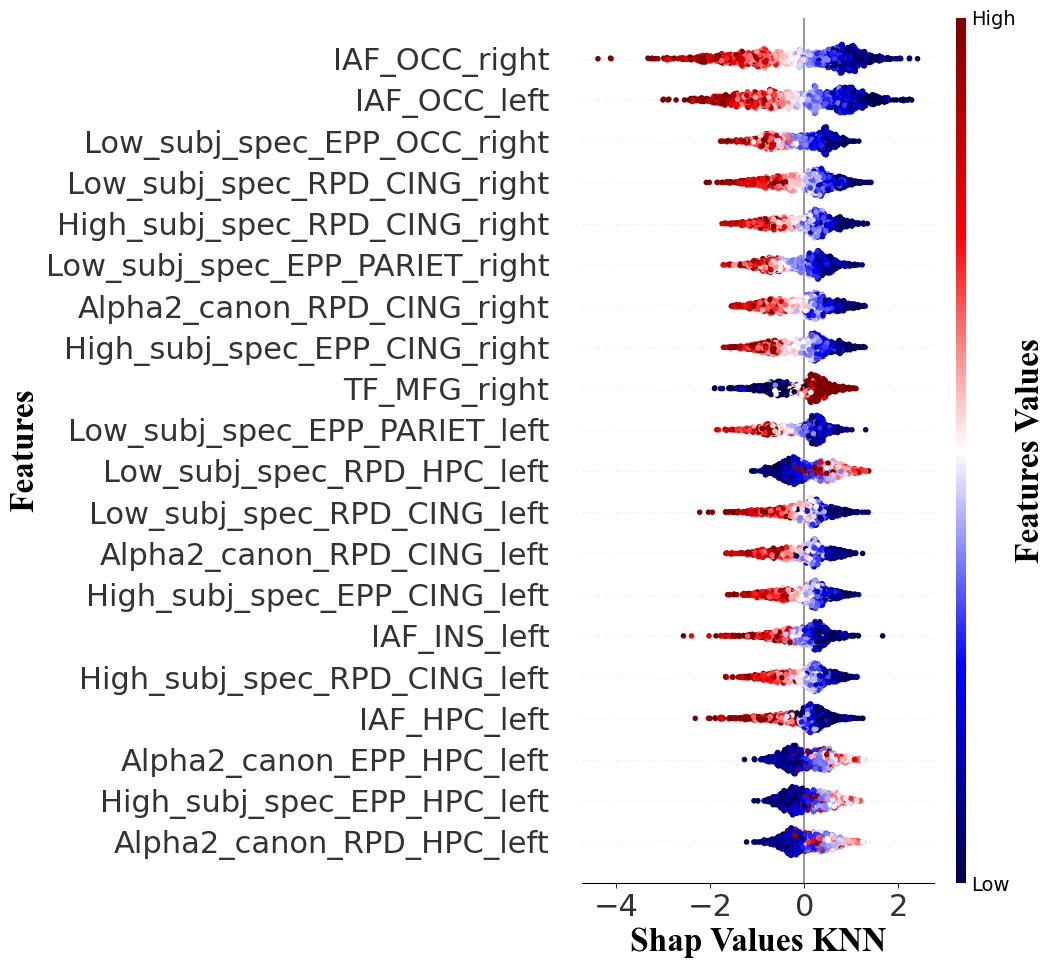

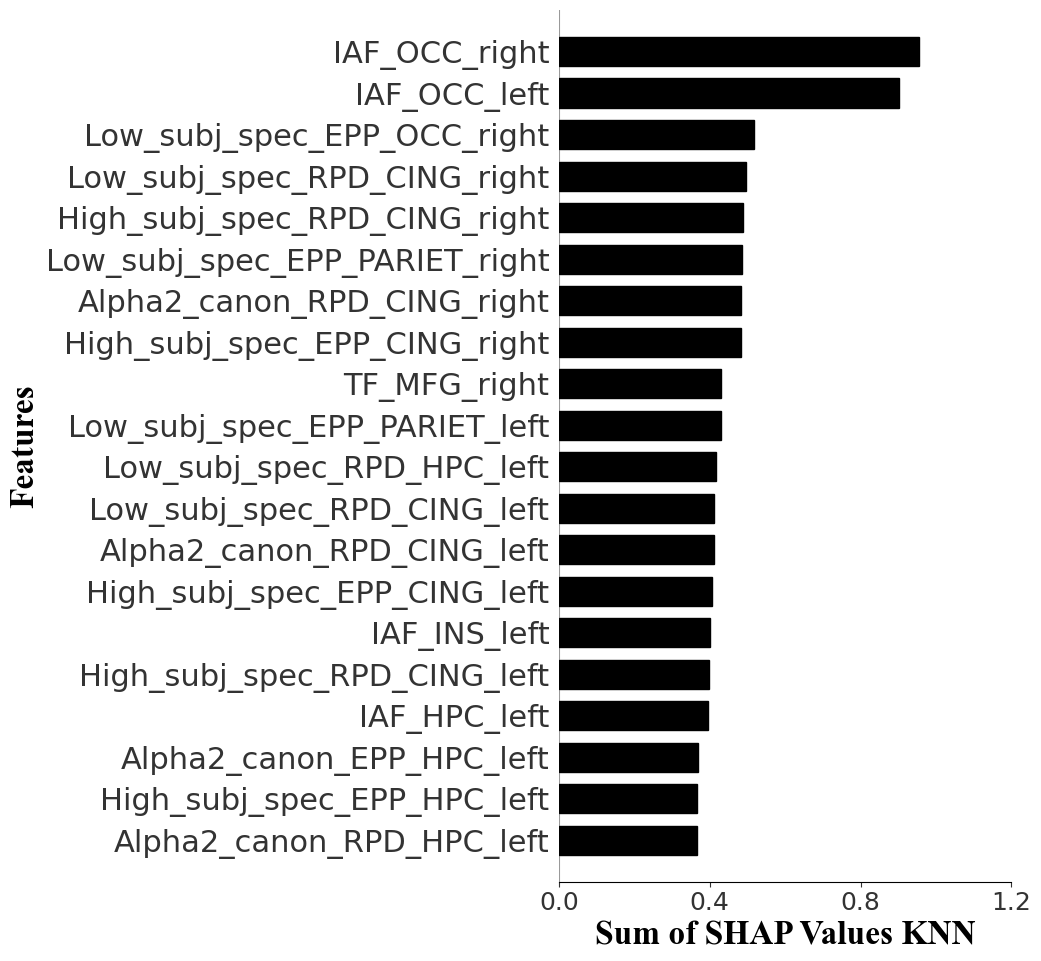

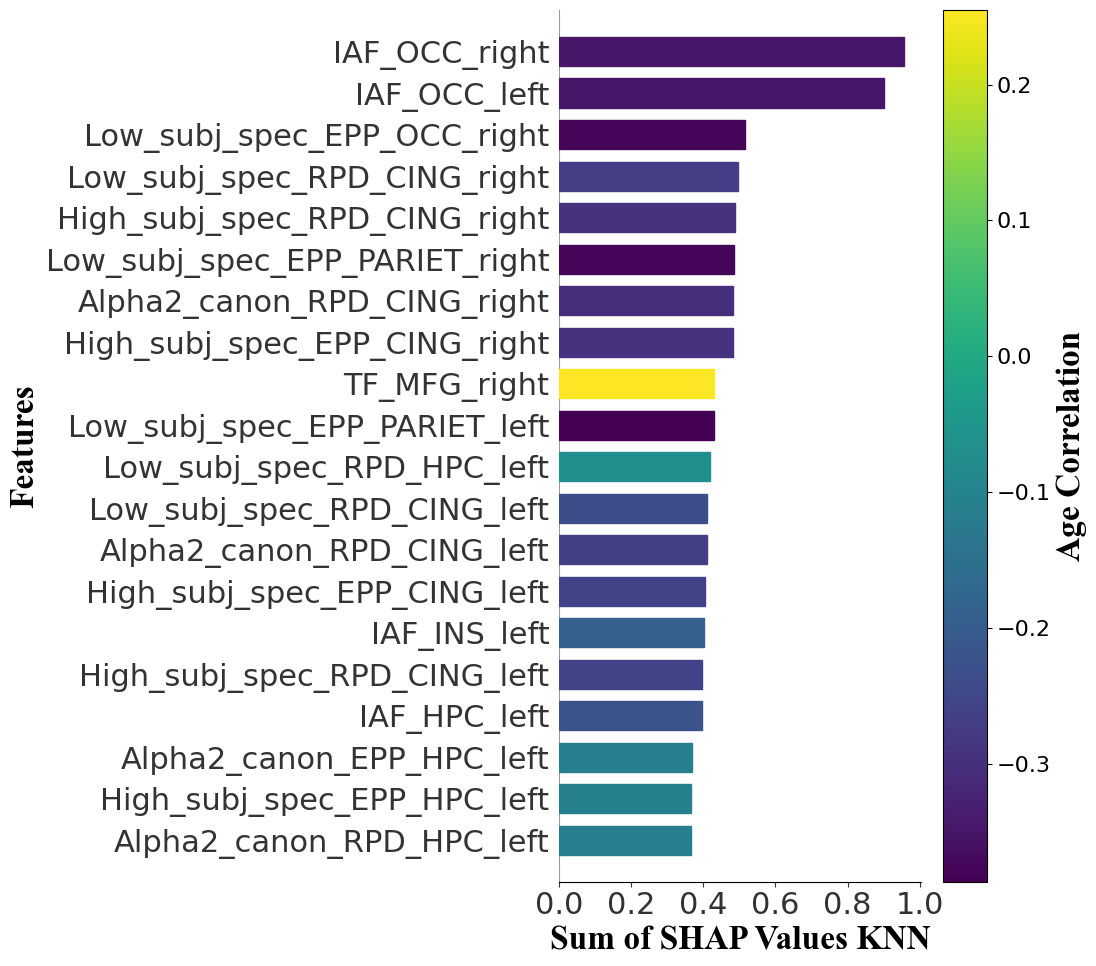

In [20]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN_scaled,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1=f'Shap Values {nameset}', xlabel2=f'Sum of SHAP Values {nameset}',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [8]:
shap_por_region_sorted, resultado_normalizado_sorted=model.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=10)

CING_right: 1.000000
OCC_right: 0.755401
OCC_left: 0.462823
PARIET_right: 0.248620
MFG_right: 0.221158
PARIET_left: 0.220277


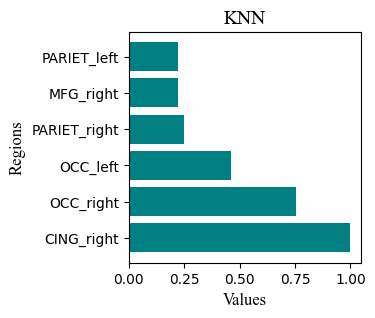

In [9]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color=colorset, name_set=nameset,x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


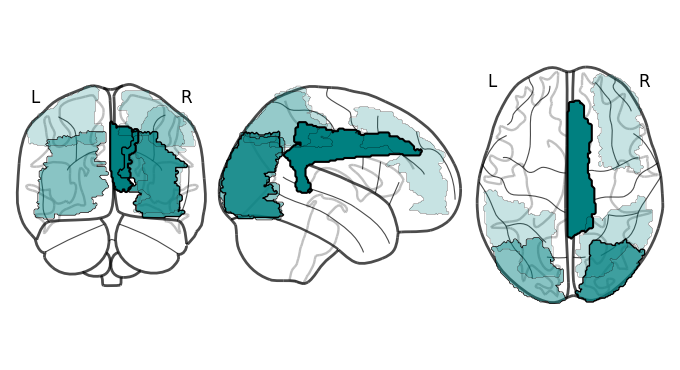

In [10]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color=colorset)